In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('growth_guide.xlsx')
df.head()

,age,avg_hb
0,35,112
1,40,128
2,38,130
3,44,138
4,67,158


In [3]:
df.shape

(10, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     10 non-null     int64
 1   avg_hb  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


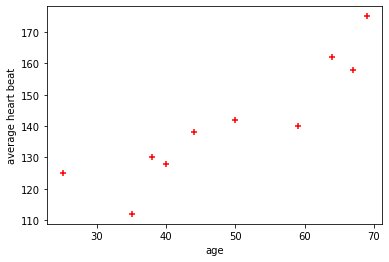

In [5]:
%matplotlib inline 
plt.xlabel('age')
plt.ylabel('average heart beat')
plt.scatter(df.age, df.avg_hb, color='red', marker='+')

In [6]:
new_df = df.drop('avg_hb', axis= 'columns')
new_df

,age
0,35
1,40
2,38
3,44
4,67
5,64
6,59
7,69
8,25
9,50


In [7]:
avg_hb = df.avg_hb
avg_hb

0    112
1    128
2    130
3    138
4    158
5    162
6    140
7    175
8    125
9    142
Name: avg_hb, dtype: int64

In [8]:
#y = mx + b [m->slop, b->intercept] --------> In our case avg_hb_pm = m * age + b  (avg_hb_pm - dependent), (age - independent)

In [9]:
#Create Linear Regression Object
reg = linear_model.LinearRegression()
reg.fit(new_df, avg_hb)

LinearRegression()

In [10]:
#here is less features so we no need to splitting Data

In [11]:
#Let's see how well our model performs on the test data (for which we already have the labels)
reg.predict([[35]])
#We can see that our model is something good.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([124.93113378])

In [12]:
# In linear equation a slope(m) as coefficent 
print('Coefficient:',reg.coef_)

Coefficient: [1.1396359]


In [13]:
#and intercept is bias
print('Intercept:',reg.intercept_)

Intercept: 85.04387720240128


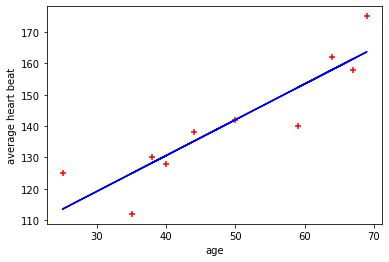

In [14]:
%matplotlib inline 
plt.xlabel('age')
plt.ylabel('average heart beat')
plt.scatter(df.age, df.avg_hb, color='red', marker='+')
plt.plot(df.age, reg.predict(df[['age']]), color= 'blue')

In [15]:
#We can plot available ages and avg_hb_pm in form of scatter plot where the red markers show the available of data point and we draw this blue line best fit these data point.

In [16]:
# Generate excel file with list of (Average heart beat per minute) Prediction : ----> here is example age available and we predict the avg_hb_pm
data = pd.read_excel('new_ages.xlsx')
data

,age
0,26
1,24
2,36
3,65
4,48
5,45
6,62
7,58
8,14
9,53


In [17]:
pred = reg.predict(data)

In [18]:
# create a new column in data frame 
data['avg_hb'] = pred

In [19]:
#export the value to new_ages.excel
data.to_excel("prediction.xlsx", index=False)

In [20]:
#Acuuracy Of Model is the way of assessing the performance of the  model.
print('Accuracy of model is', (reg.score(new_df,avg_hb)) * 100)

Accuracy of model is 81.03075004923768
